# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import cufflinks as cf


warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
cf.go_offline()

In [5]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

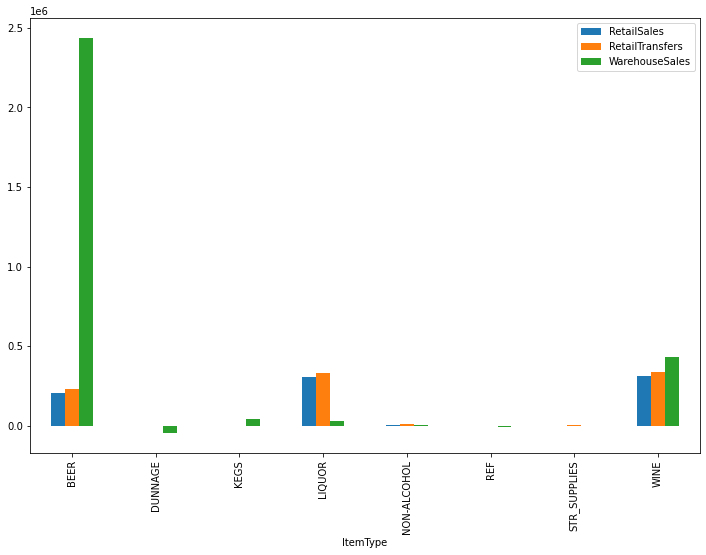

In [6]:
data.groupby('ItemType')['RetailSales','RetailTransfers','WarehouseSales'].sum().plot(kind='bar',figsize=(12,8))
#with group by agroup the data or each "item" and we use the columns Retail sales, retail transf. and warehouse.
#then use the function .sum() for to have the total sales for each column
#finally plot the data with the type 'bar' and the figsize

using cufflinks...

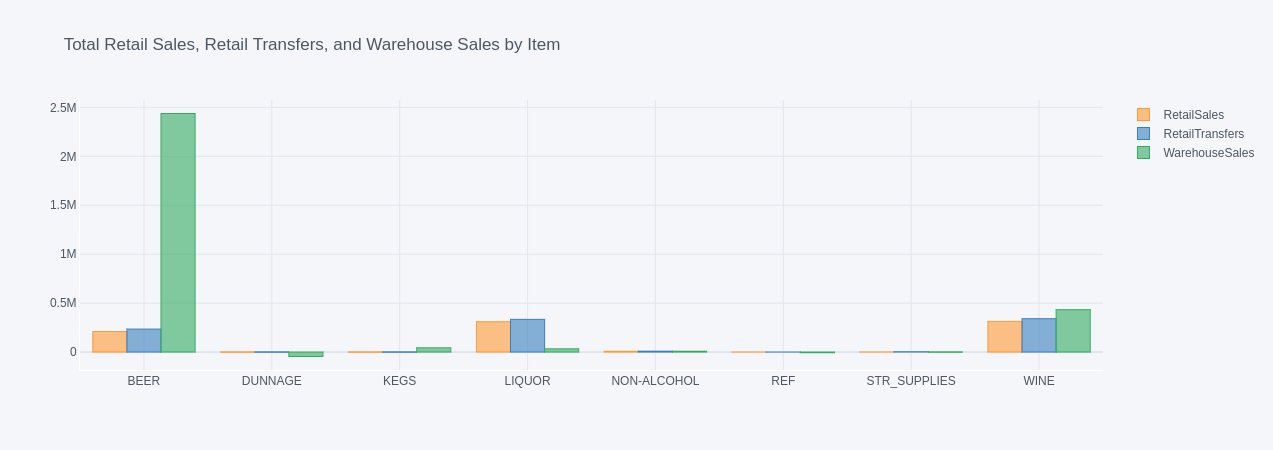

In [8]:
data.groupby('ItemType')['RetailSales','RetailTransfers','WarehouseSales'].sum().iplot(kind='bar', 
                                                                                       title='Total Retail Sales, Retail Transfers, and Warehouse Sales by Item')

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

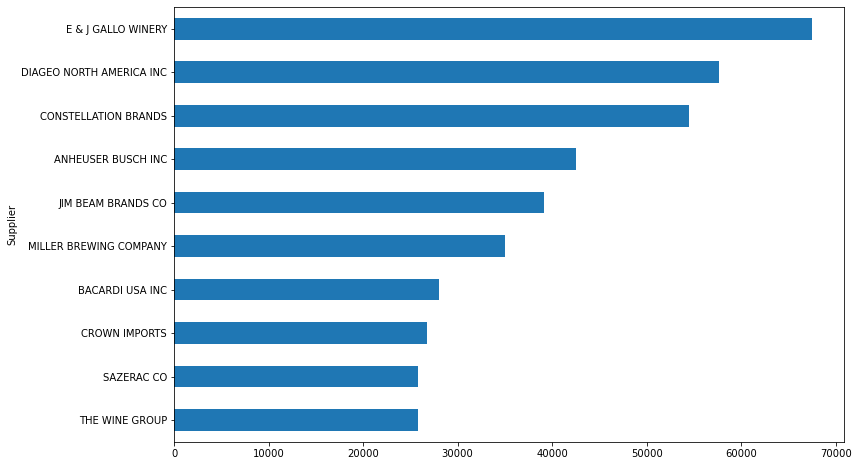

In [107]:
data.groupby('Supplier')['RetailSales'].sum().sort_values(ascending=False).iloc[:10].plot(kind='barh',figsize=(12,8)).invert_yaxis()
#use sort_values for to order the colum "Supplier", with this has the suppliers with most sales in the head of the data column 
#use .iloc for select only the top ten suppliers
#use .invert_yaxis() for to see the supplier with most value in the the top

using cufflinks...

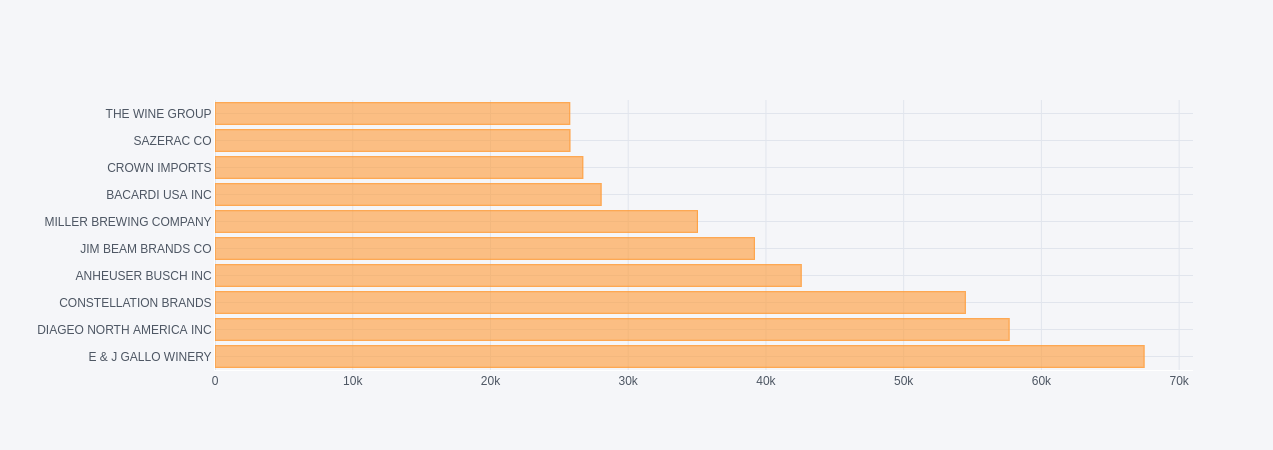

In [41]:
data.groupby('Supplier')['RetailSales'].sum().sort_values(ascending=False).iloc[:10].iplot(kind='barh')

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

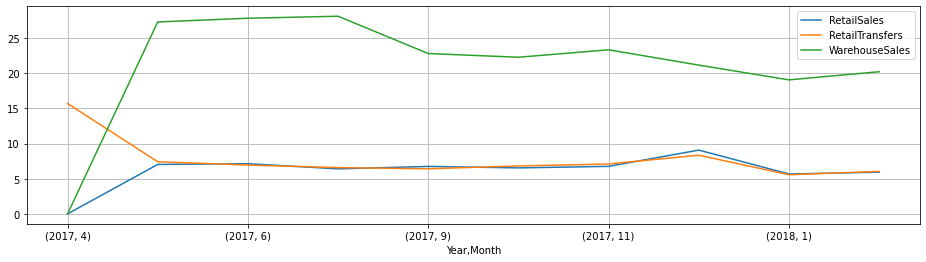

In [108]:
group_year_month = data.groupby(['Year','Month'])['RetailSales','RetailTransfers','WarehouseSales'].mean()
group_year_month.plot(figsize=(16,4), grid=True)
#use groupby with the columns Year and Month for to have the data over time


## 4. Plot the same information as above but as a bar chart.

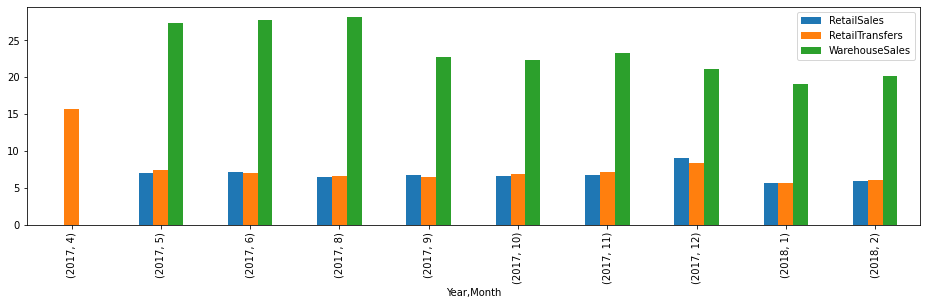

In [20]:
group_year_month.plot(kind='bar', figsize=(16,4))
#use kind='bar' for to have a bar chart

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

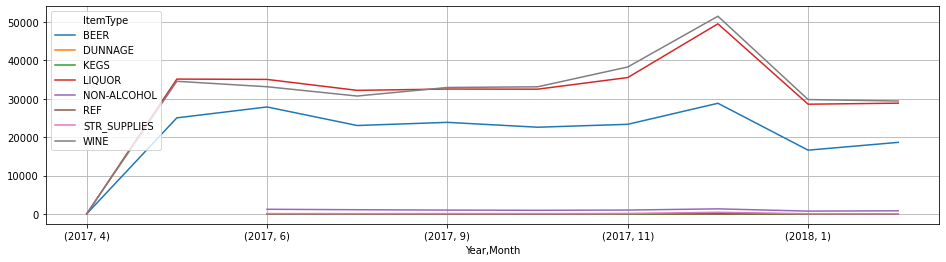

In [86]:
data.pivot_table(index=['Year','Month'],columns='ItemType', values='RetailSales',aggfunc=sum).plot(figsize=(16,4), grid=True)
#with pivot_table can put in the axis X the "over time" (year & month), put the values = retails sales with the aggregate function "sum"
#and in the "columns" put the Item type for to have a line for each item

## 6. Plot the same information as above but as a bar chart.

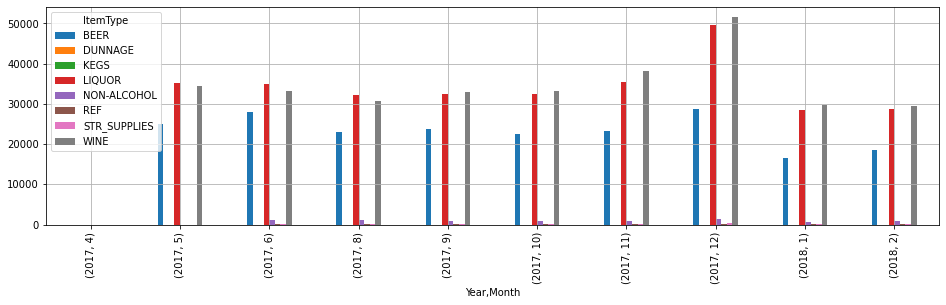

In [109]:
data.pivot_table(index=['Year','Month'],columns='ItemType', values='RetailSales',aggfunc=sum).plot(kind='bar', figsize=(16,4), grid=True)
#in this case, use kind='bar' for to have the informacion in a bar chart

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

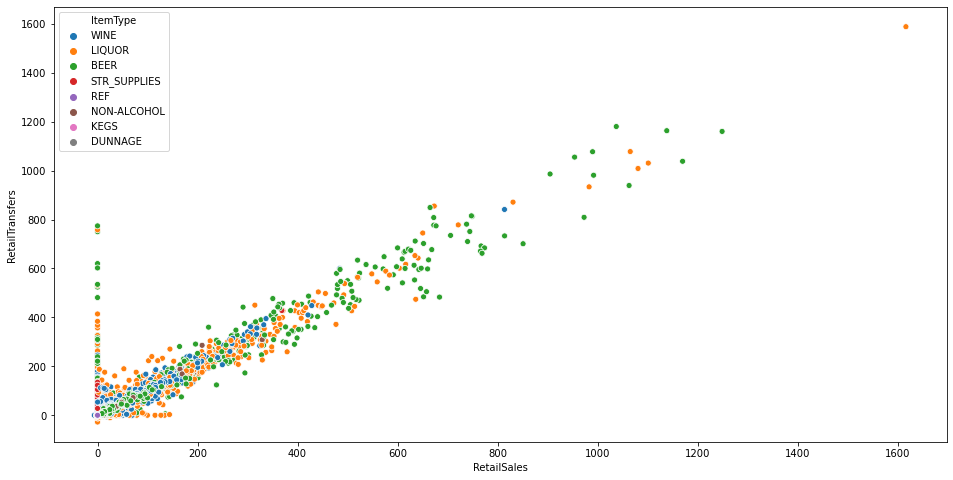

In [96]:
fig = plt.figure(figsize=(16, 8))
ax = sns.scatterplot(data=data, x='RetailSales', y='RetailTransfers', hue='ItemType')
plt.show()
#use a sns.scatterplot for to have a scatter plot
#in the axis X, put the retail sales, in the axis Y, put the Retatil transfers 
#and use "hue" for to have the points with color for each item

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

<Figure size 2304x1152 with 0 Axes>

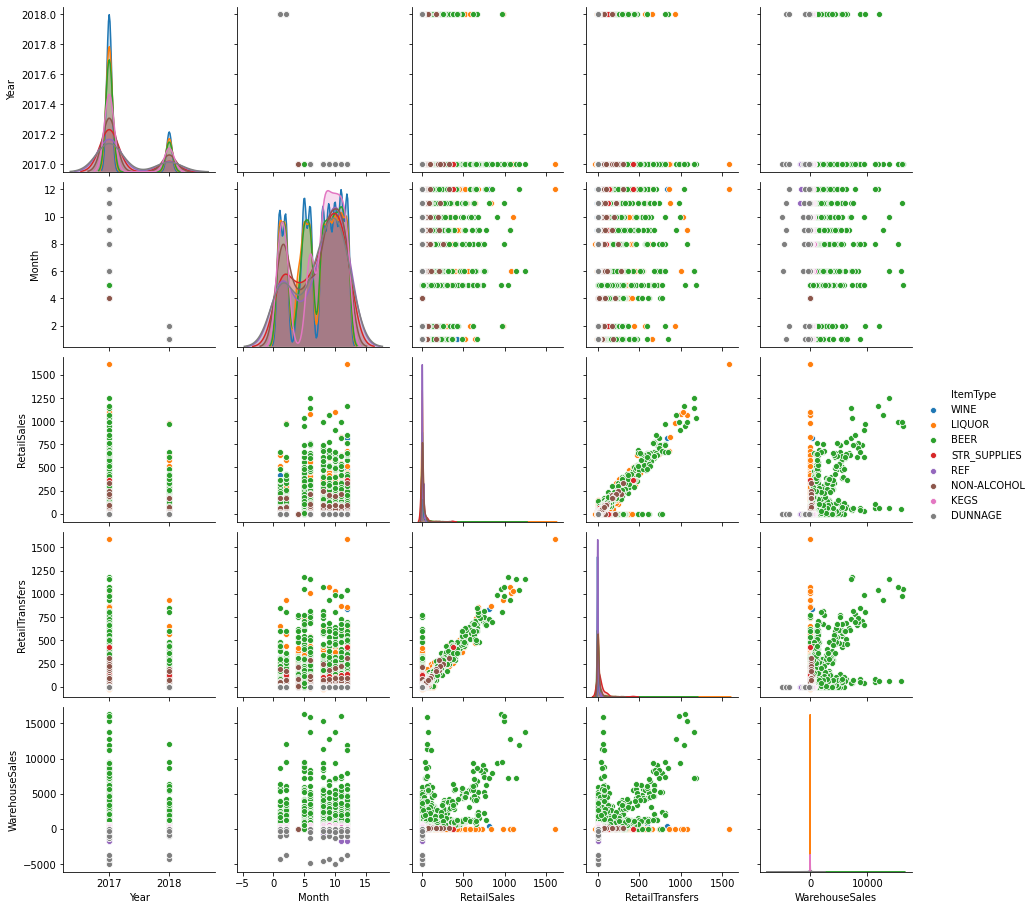

In [110]:
fig = plt.figure(figsize=(32, 16))
ax = sns.pairplot(data,hue='ItemType')
plt.show()
#with sns.pairplot and use the hue = item, we have the scatter matrix for all numerics fields in the data set 
#and with the color for each item